# Визуализация данных рынка общественного питания Москвы
<br>
Заказчик запланировал открыть небольшое кафе в Москве. Отличительная особенность - обслуживание роботами. 
Средства на открытие будут привлекаться от инвесторов. Инвесторов интересует текущее положение дел на рынке и насколько перспективно в долгосрочном периоде кафе с роботами-официантами. Наша главная задача - <b> подготовить исследование рынка с использованием информации из открытых источников</b>. Мы имеем два набора данных, один из которых содержит информацию об объектах общепита, а второй - об улицах и районах города.
Разделим данные исследование на несколько шагов:<br>

## <a href='#section1'>1 Загрузка данных и подготовка к анализу</a><br>
## <a href='#section2'>2 Анализ данных</a><br>
### <a href='#section21'>2.1 Исследование соотношения видов объектов по количеству</a><br>
### <a href='#section22'>2.2 Исследование соотношения сетевых и несетевых заведений по количеству</a><br>
### <a href='#section23'>2.3 Описание среднего количества посадочных мест</a><br>
### <a href='#section24'>2.4 Выделение информации об улице (из столбца address)</a><br>
### <a href='#section25'>2.5 Построение графика топ-10 улиц</a><br>
### <a href='#section26'>2.6 Поиск числа улиц с одним объектом общественного питания</a><br>
### <a href='#section27'>2.7 Анализ распределения посадочных мест для улиц с большим количеством объектов</a><br>
### <a href='#section28'>2.8 Формулирование общего вывода, рекомендаций, комментариев</a><br>

## <a id='section1'>1 Загрузка данных и подготовка к анализу</a><br>

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
#Настраиваем стиль графиков
plt.style.use('seaborn-pastel')
large = 14; med = 12; small = 10
params = {'figure.figsize': (14, 7),
          'axes.grid' : True,
          'grid.alpha': 0.3,
          'axes.titlesize': med,
          'axes.titleweight': 'light',
          'axes.labelweight': 'light',
          'legend.fontsize': small,
          'axes.labelsize': med,
          'axes.titlesize': large,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large
          }
plt.rcParams.update(params)
#Загружаем данные для анализа
rest_data = pd.read_csv('/datasets/rest_data.csv')
streets_and_areas = pd.read_csv('/datasets/moscow-streets.csv')
rest_data.head(100)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
95,127674,СУШИ SHOP,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Бирюзова, дом 13",12
96,142568,Хинкальная (на М. Бирюзова),нет,кафе,"город Москва, улица Маршала Бирюзова, дом 16",14
97,125817,ШАУРМА ЖИ,нет,закусочная,"город Москва, улица Маршала Бирюзова, дом 19",16
98,129397,СУШИ ВОК,да,кафе,"город Москва, улица Маршала Бирюзова, дом 19",6


In [2]:
#Приведем названия объектов к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [3]:
#Проверяем данные на аномалии и ошибки
def check_data(df):
    print('Основные статистические характеристики')
    display(df.describe())
    print('Краткий обзор набора данных')
    display(df.info())
    print('Проверка на дубликаты')
    display(df.duplicated().unique())
check_data(rest_data)

Основные статистические характеристики


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Краткий обзор набора данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

Проверка на дубликаты


array([False])

Пропущенные значения отсутствуют. Тип данных в каждой колонке - правильный.

In [4]:
#Проверим дубликаты, исключив дополнительные уникальный индекс - поле id
rest_data[rest_data.duplicated(subset = ['object_name', 
                                         'chain', 
                                         'object_type', 
                                         'address', 
                                         'number'])].head(20)

,id,object_name,chain,object_type,address,number
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3397,71896,буфет «коникс-школьник»,нет,буфет,"город Москва, улица Удальцова, дом 21",100
3481,20914,буфет мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,столовая «комбинат питания космос»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5069,20025,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
5147,145227,кафе при азс,нет,кафе,"город Москва, Огородный проезд, дом 7, строение 1",0
5185,107442,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",20
5186,107574,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",10


In [5]:
#Посчитаем, сколько дубликатов имеется
len(rest_data[rest_data.duplicated(subset = ['object_name',
                                             'chain', 
                                             'object_type', 
                                             'address', 
                                             'number'])])

85

Дубликатов не так много. Встречаются такие, у которых различается количество посадочных мест или имя объекта. Возможная причина появления - человеческий фактор. Удалим их, оставив только первое значение в таблице.

In [6]:
rest_data.drop_duplicates(subset=['object_name', 
                                  'chain', 
                                  'object_type', 
                                  'address', 
                                  'number'],
                                  keep='first', 
                                  inplace=True)

## <a id='section2'>2 Анализ данных</a><br>

### <a id='section21'>2.1 Исследование соотношения видов объектов по количеству</a><br>

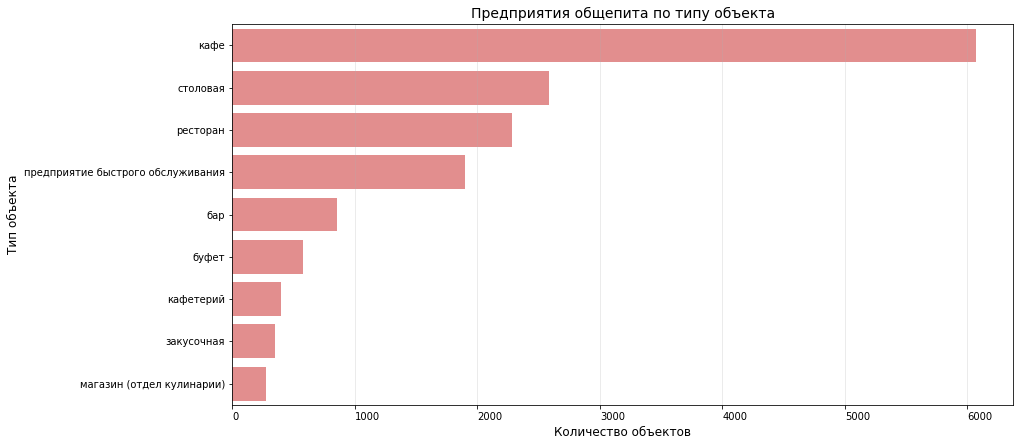

In [7]:
#Сгруппируем данные по типу объекта
rest_data_grouped_by_object_type = rest_data\
                                        .groupby('object_type')\
                                        .agg('count')\
                                        .reset_index()[['object_type', 'id']]\
                                        .sort_values(by='id', ascending=False)
#Построим график
sns.barplot(x = rest_data_grouped_by_object_type['id'],
            y = rest_data_grouped_by_object_type['object_type'],
            color='lightcoral')
plt.title('Предприятия общепита по типу объекта')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта')
plt.xticks(ha='left')
plt.show()

Больше всего предприятий общепита являются кафе, столовыми или ресторанами.

### <a id='section22'>2.2 Исследование соотношения сетевых и несетевых заведений по количеству</a><br>

In [8]:
#Сгруппируем сетевые и несетевые заведения
rest_data_grouped_by_chain = rest_data\
                                    .groupby('chain')\
                                    .agg('count')\
                                    .reset_index()[['chain', 'number']]
rest_data_grouped_by_chain.head()

,chain,number
0,да,2964
1,нет,12317


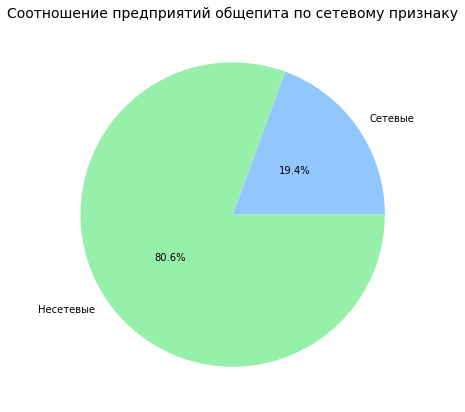

In [9]:
#Построим график соотношения
labels = ['Сетевые', 'Несетевые']
plt.pie(data=rest_data_grouped_by_chain,
        x='number', 
        autopct="%.1f%%",
        labels=labels,
        pctdistance=0.5)
plt.title('Соотношение предприятий общепита по сетевому признаку')
plt.show()

Несетевых объектов значительно больше. Это говорит о разнообразии вкусов населения и высоком уровне присутствия малого бизнеса в этой сфере.

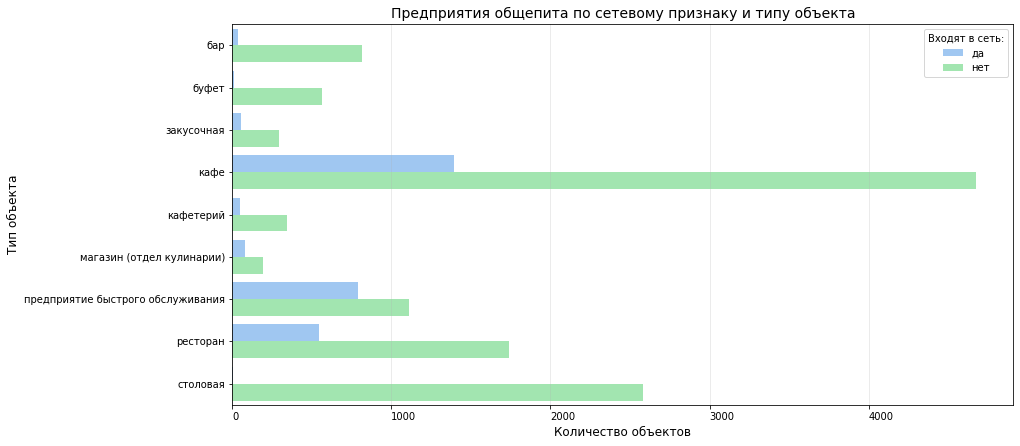

In [10]:
#Сгруппируем данные по сетевому признаку и типам объекта
rest_data_grouped_by_chain_and_object_type = rest_data\
                                            .groupby(['chain', 'object_type'])\
                                            .agg('count')\
                                            .reset_index()[['chain', 'object_type', 'number']]
#Построим график
sns.barplot(x="number", 
            y="object_type",
            hue="chain",
            data=rest_data_grouped_by_chain_and_object_type)
plt.xticks(ha='left')
plt.title('Предприятия общепита по сетевому признаку и типу объекта')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта')
plt.legend(title='Входят в сеть:')
plt.show()

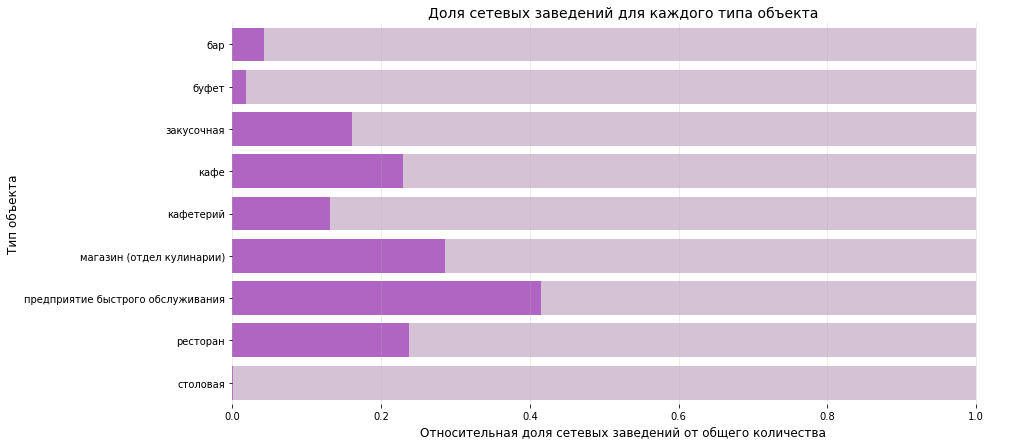

In [11]:
#Определим относительное распространение сетевых заведений для каждого типа объекта
chain_yes = rest_data_grouped_by_chain_and_object_type[rest_data_grouped_by_chain_and_object_type['chain'] == 'да']
chain_no = rest_data_grouped_by_chain_and_object_type[rest_data_grouped_by_chain_and_object_type['chain'] == 'нет']
chain_type_comparison = chain_yes[['object_type', 'number']]\
                            .merge(chain_no[['object_type', 'number']],
                                   on ='object_type',
                                   suffixes=('_chain_yes', '_chain_no'))
chain_type_comparison['chain_ratio'] = (chain_type_comparison['number_chain_yes']\
                                        / (chain_type_comparison['number_chain_no'] + chain_type_comparison['number_chain_yes']) )
chain_type_comparison = chain_type_comparison.set_index('object_type')
chain_type_comparison['no_chain_ratio'] = 1 - chain_type_comparison['chain_ratio']
chain = chain_type_comparison[['chain_ratio', 'no_chain_ratio']].cumsum(axis=1)
#Построим график
f, ax = plt.subplots()
sns.barplot(x = chain['no_chain_ratio'], y = chain.index, label='chain_no_ratio', color='thistle')
sns.barplot(x = chain['chain_ratio'], y = chain.index, label='chain_ratio', color='mediumorchid')
sns.despine(left=True, bottom=True)
plt.title('Доля сетевых заведений для каждого типа объекта')
plt.xlabel('Относительная доля сетевых заведений от общего количества')
plt.ylabel('Тип объекта')
plt.show()

Среди лидеров по доле сетевых заведений - предприятия быстрого обслуживания, магазин(отдел кулинарии), рестораны и кафе. Меньше всего сетевых заведений среди столовых. Чем обусловлены эти различия? Вероятно, это связано с тем, что специфика работа столовых - низкая цена и наиболее привычные блюда. С таким предложением сложно построить бренд, масштабировать его, поэтому эти заведения не входят в сети. У предприятий быстрого обслуживания же как правило сетевая структура с уникальным комбинированным предложением блюд. Часто, они развиваются по модели франшизы.

### <a id='section23'>2.3 Описание среднего количества посадочных мест</a><br>

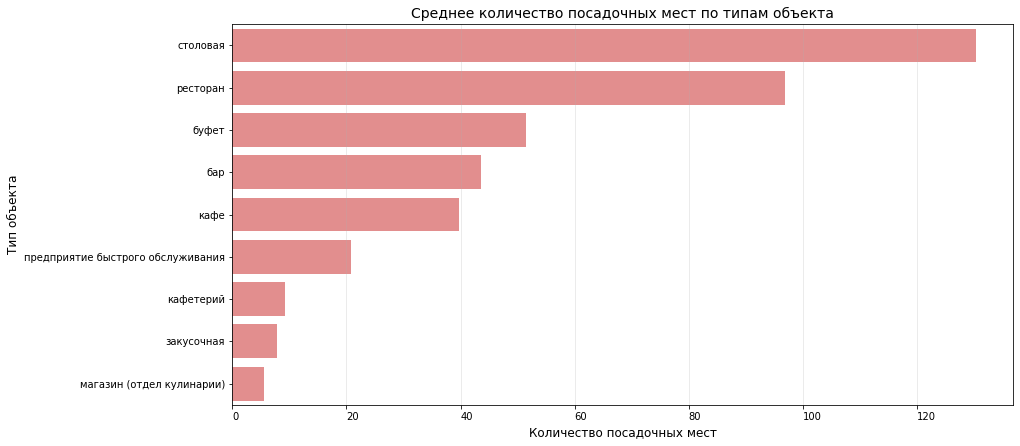

In [12]:
#Сгруппируем данные по типу объекта, чтобы найти среднее количество посадочных мест
rest_data_grouped_by_object_type_mean = rest_data\
                                        .groupby('object_type')\
                                        .agg('mean')\
                                        .reset_index()[['object_type', 'number']]\
                                        .sort_values(by='number', ascending=False)
#Построим график
sns.barplot(x = rest_data_grouped_by_object_type_mean['number'],
            y = rest_data_grouped_by_object_type_mean['object_type'],
            color='lightcoral')
plt.xticks(ha='left')
plt.title('Среднее количество посадочных мест по типам объекта')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип объекта')
plt.show()

Среди заведений наиболее интересны в аспекте наибольшего среднего количества посадочных мест - столовые, рестораны, буфеты, бары, кафе. Кафе, рестораны, столовые имеют собственные кухни и рассчитаны на большую проходимость клиентов, которые не забирают еду на вынос и планируют принимать пищу в течение продолжительного времени( в сравнении, например, с предприятиями быстрого обслуживания). Бары в свою очередь - место отдыха для компаний людей. Туда приходят для общения и проводят в них также достаточно много времени. Буфеты, как и столовые, имеют много посадочных мест в т.ч. и потому, что заполняются посетителями в какие-то пиковые часы, например обеденное время для работников офисов/предприятий поблизости.

In [13]:
#Определим наиболее распространенное количество посадочных мест у несетевых заведений
np.median(rest_data[rest_data['chain'] == 'нет']['number'])

40.0

In [14]:
#Определим наиболее распространенное количество посадочных мест у сетей
np.median(rest_data[rest_data['chain'] == 'да']\
          .groupby('object_name')[['number']]\
          .agg('median'))

43.5

In [15]:
#Определим, сколько в среднем заведений входит в сеть
rest_data[rest_data['chain'] == 'да']\
                .groupby('object_name')[['id']]\
                .agg('count').reset_index()['id']\
                .value_counts()[:5]

1    331
2     77
3     45
6     23
5     17
Name: id, dtype: int64

Посадочных мест у сетевых заведений больше, чем у несетевых. В сети обычно входит немного заведений.

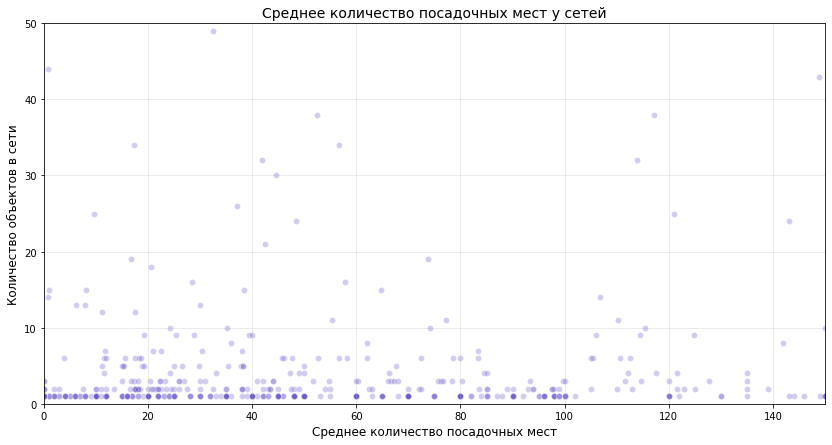

In [16]:
#Построим график, чтобы посмотреть сколько заведений входят в сети и сколько они имеют посадочных мест
chain_yes_data_pivoted = pd.pivot_table(rest_data[rest_data['chain'] == 'да'],
                                      values=['id', 'number'],
                                      index='object_name',
                                      aggfunc={'id': 'count', 'number': 'mean'}).reset_index()
sns.scatterplot(data=chain_yes_data_pivoted,
                x='number',
                y='id', 
                color="slateblue",
                alpha=0.3)
plt.title('Среднее количество посадочных мест у сетей')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Количество объектов в сети')
plt.ylim(0, 50)
plt.xlim(0, 150)
plt.show()

Многие сети включают только 1 заведение. Это могут быть франшизы, распространяемые под разными ИП. При более скрупулезном анализе их следует исключить, как и те, которые имеют 0 посадочных мест.

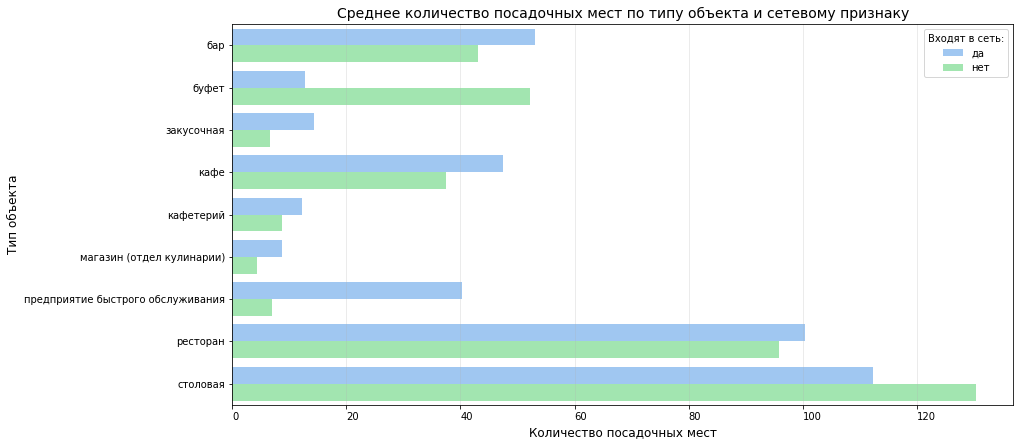

In [17]:
#Сгруппируем данные по типу объекта и сетевому признаку, чтобы найти среднее количество посадочных мест для этих групп
rest_data_grouped_by_object_type_and_chain_mean = rest_data\
                                                    .groupby(['chain', 'object_type'])\
                                                    .agg('mean')\
                                                    .reset_index()[['chain', 'object_type', 'number']]
#Построим график
sns.barplot(data = rest_data_grouped_by_object_type_and_chain_mean,
            x = 'number',
            y='object_type',
            hue='chain')
plt.xticks(ha='left')
plt.title('Среднее количество посадочных мест по типу объекта и сетевому признаку')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип объекта')
plt.legend(title='Входят в сеть:')
plt.show()

Обычно, у сетевых заведений больше посадочных мест, чем у несетевых. Это может быть связано с тем, что у них более продуманная экономика и формат заведений, поэтому они больше и приносят больше прибыли. Иначе обстоит ситуация со столовыми и буфетами - у несетевых заведений больше посадочных мест. Большие столовые и буфеты могут находиться рядом (или внутри) с крупными бизнес-центрами или местами для организациями культурно-массовых мероприятий. Это может быть объяснением, почему они несетевые: здесь могут иметь значение как возможность аренды помещения для такого заведения, так и нестандартный для сетевых столовых/буфетов масштаб предоставления услуг.

### <a id='section24'>2.4 Выделение информации об улице (из столбца address)</a><br>

In [18]:
#Напишем функцию, которая будет разделять адрес по запятым и доставать название улицы, для каждой строки в датафрейме
def street_finder(df):
    address = df['address']
    streets = ['улица','проспект','переулок', 'шоссе','бульвар',
                'проезд', 'площадь','набережная','территория', 'аллея']
    index = address.count(',')
    for i in range(len(df)):
        for j in streets:
            for k in range(index):
                if j in address.split(', ')[k]:
                    return address.split(', ')[k]
#Создадим новый столбец, получив названия улиц функцией
rest_data['street'] = rest_data.apply(street_finder, axis=1)
rest_data[['address', 'street']].head()

,address,street
0,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица


In [19]:
#Посмотрим, сколько значений не удалось достать
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 7 columns):
id             15281 non-null int64
object_name    15281 non-null object
chain          15281 non-null object
object_type    15281 non-null object
address        15281 non-null object
number         15281 non-null int64
street         14891 non-null object
dtypes: int64(2), object(5)
memory usage: 955.1+ KB


In [20]:
#Удалим NA значения улиц из датафрейма
rest_data_filtered = rest_data[~rest_data['street'].isna()]

In [21]:
print('Количество улиц, где размещены 14976 объектов общепита:',\
      len(rest_data_filtered.groupby('street').agg('count')))

Количество улиц, где размещены 14976 объектов общепита: 1887


### <a id='section25'>2.5 Построение графика топ-10 улиц</a><br>

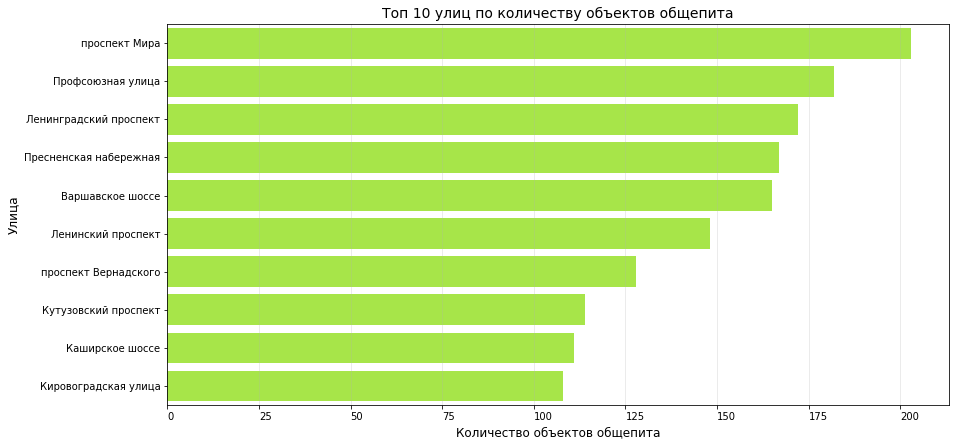

In [22]:
#Сгруппируем данные по улицам
streets_grouped = rest_data_filtered\
                        .groupby('street')\
                        .agg('count')\
                        .reset_index()[['street', 'id']]
#Найдем 10 улиц с самым большом количеством объектов
top_10_streets = streets_grouped.sort_values(by='id', ascending=False)[:10]
#Построим график
sns.barplot(x = 'id',
            y = 'street',
            data=top_10_streets,
            color='greenyellow')
plt.xticks(ha='left')
plt.title('Топ 10 улиц по количеству объектов общепита')
plt.xlabel('Количество объектов общепита')
plt.ylabel('Улица')
plt.show()

Ожидаемо, что больше всего объектов общепита размещены в центральной части города, на улицах где есть много домов.

In [23]:
streets_and_areas

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [24]:
#Создадим словать из названий улиц и районов, используя второй датафрейм streets_and_areas
area_dict = dict(zip(streets_and_areas['streetname'], streets_and_areas['area']))
#Добавим к каждому наблюдению в первый датафрейм значение из словаря. Другими словами, определим для каждой улицы район
rest_data_filtered['area'] = rest_data_filtered['street'].map(area_dict)
#Удалим строки с NA значениями в столбце area 
rest_data_filtered = rest_data_filtered.dropna(subset=['area'])
rest_data_filtered[['street', 'area']].head()

,street,area
0,улица Егора Абакумова,Ярославский Район
1,улица Талалихина,Район Южное Бутово
2,Абельмановская улица,Таганский район
3,Абрамцевская улица,Район Лианозово
4,Абрамцевская улица,Район Лианозово


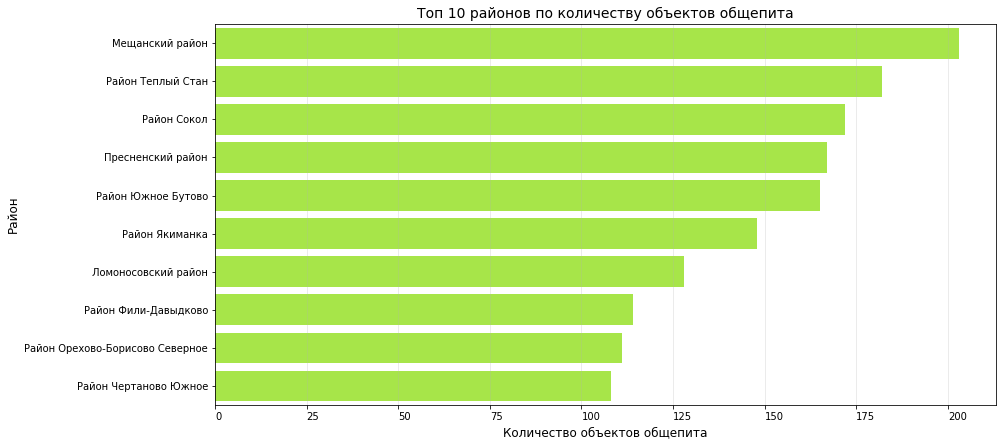

In [25]:
#Отфильтруем данные, оставив наблюдения с топ-10 улицами по количеству объектов
rest_data_filtered_top_10_streets = rest_data_filtered[rest_data_filtered['street']\
                                                       .isin(top_10_streets['street'])]
#Сгруппируем данные по районам
rest_data_filtered_top_streets_grouped = rest_data_filtered_top_10_streets\
                                                .groupby('area')\
                                                .agg('count')\
                                                .reset_index()[['area', 'id']]\
                                                .sort_values(by='id', ascending=False)
#Построим график топ районов, в которых находятся топ 10 улиц 
sns.barplot(data = rest_data_filtered_top_streets_grouped, 
              x='id', 
              y='area',
              color='greenyellow')
plt.xticks(ha='left')
plt.title('Топ 10 районов по количеству объектов общепита')
plt.xlabel('Количество объектов общепита')
plt.ylabel('Район')
plt.show()

Больше всего объектов в районах, которые находятся в центре или незначительно удалены от него.

### <a id='section26'>2.6 Поиск числа улиц с одним объектом общественного питания</a><br>

In [26]:
#Определим сколько улиц имеют один объект общепита
bottom_streets = streets_grouped[streets_grouped['id'] == 1]
print('Всего', len(bottom_streets), 'улиц с одним объектом общественного питания')
print('Это составляет {:.2%}'.format(len(bottom_streets)/len(streets_grouped)), 'от общего количества улиц' )

Всего 539 улиц с одним объектом общественного питания
Это составляет 28.56% от общего количества улиц


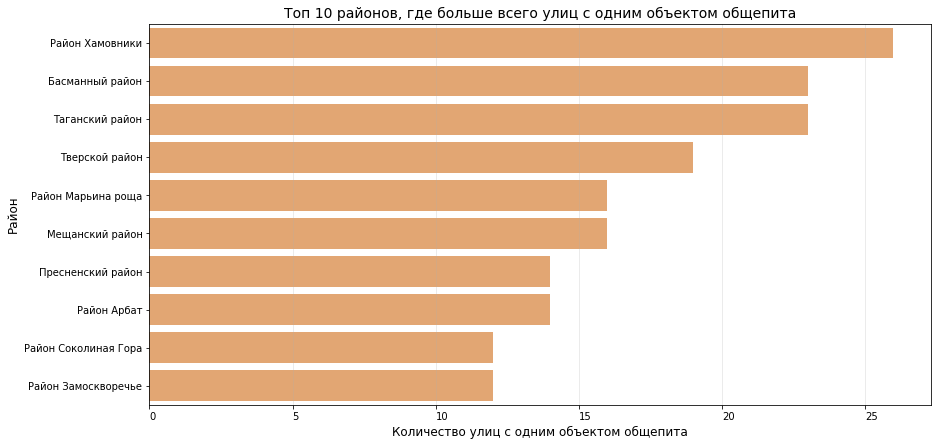

In [27]:
#Отфильтруем данные, оставив наблюдения с улицами, где есть только один объект общепита
rest_data_filtered_bottom_streets = rest_data_filtered[rest_data_filtered['street']\
                                                       .isin(bottom_streets['street'])]
#Сгруппируем данные по районам
rest_data_filtered_bottom_streets_grouped = rest_data_filtered_bottom_streets\
                                                .groupby('area')\
                                                .agg('count')\
                                                .reset_index()[['area', 'id']]\
                                                .sort_values(by='id', ascending=False)[:10]
#Построим график
sns.barplot(data = rest_data_filtered_bottom_streets_grouped,
            x = 'id',
            y='area',
            color='sandybrown')
plt.xticks(ha='left')
plt.title('Топ 10 районов, где больше всего улиц с одним объектом общепита')
plt.xlabel('Количество улиц с одним объектом общепита')
plt.ylabel('Район')
plt.show()

Больше всего улиц с 1 заведением общепита там, где слишком дорогая аренда. Содержать заведение в таком месте может оказаться нерентабельным. Размеры улиц в центре также небольшие.

### <a id='section27'>2.7 Анализ распределения посадочных мест для улиц с большим количеством объектов</a><br>

In [28]:
#Определим, сколько всего объектов находится на топ-10 улицах
top_streets_list = pd.unique(top_10_streets['street']).tolist()
rest_data_top_streets = rest_data[rest_data['street'].isin(top_streets_list)]
rest_data_other_streets = rest_data[~rest_data['street'].isin(top_streets_list)]
print(len(rest_data_top_streets), 'объектов общепита находится на топ-10 улицах')

1498 объектов общепита находится на топ-10 улицах


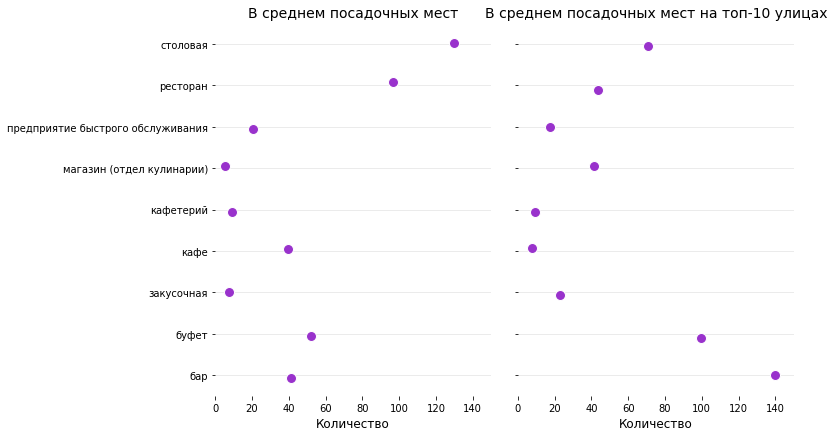

In [29]:
#Определим, как распределяются посадочные места по типам объектов для топ-10 улиц
#Создадим сводную таблицу, посчитав средние значения для разных типов объектв на топ-10 улицах
rest_data_top_streets_number = pd.pivot_table(rest_data_top_streets,
                                      values=['number'],
                                      index='object_type',
                                      aggfunc={'number': 'mean'}).reset_index()
rest_data_top_streets_number.columns = ['object_type', 'number_top_streets']
#Создадим сводную таблицу, посчитав средние значения для разных типов объектов на других улицах
rest_data_other_streets_number = pd.pivot_table(rest_data_other_streets,
                                      values=['id', 'number'],
                                      index='object_type',
                                      aggfunc={'number': 'mean'}).reset_index()
#Соединим полученные сводные таблицы для дальнейшего сравнения
rest_data_top_streets_number = rest_data_top_streets_number\
                                    .merge(rest_data_other_streets_number[['object_type','number']],\
                                    on='object_type')
#Построим график сравнения
g = sns.PairGrid(rest_data_top_streets_number,
                 x_vars=['number', 'number_top_streets'], 
                 y_vars=["object_type"],
                 height=6, 
                 aspect=.75)
g.map(sns.stripplot, size=10, orient="h",  color='darkorchid', linewidth=1, edgecolor="w")
g.set(xlim=(0,150), xlabel="Количество", ylabel="")
titles = ["В среднем посадочных мест", "В среднем посадочных мест на топ-10 улицах"]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
plt.show()

Обычно, на топ-10 улицах больше посадочных мест, чем в среднем по городу. Это говорит о большей проходимости этих мест. Исключения составляют буфеты - на этих улицах, они меньше. Особенно выделяются бары и магазины(отдел кулинарии). Вечером в центр города люди могут приезжать и из других районов.

### <a id='section28'>2.8 Формулирование общего вывода, рекомендаций, комментариев</a><br>

#### Общий вывод и комментарии

Больше всего предприятий общепита являются кафе, столовыми или ресторанами. Эти форматы наиболее рентабельны. Несетевых объектов значительно больше, что говорит о разнообразии нестандартного предложения на рынке. Среди лидеров по доле сетевых заведений - предприятия быстрого обслуживания, магазин(отдел кулинарии), рестораны и кафе. Меньше всего сетевых заведений среди столовых.  Заведения, которые наиболее интересны в аспекте наибольшего среднего количества посадочных мест - столовые, рестораны, буфеты, бары, кафе. Обычно, у сетевых заведений больше посадочных мест, чем у несетевых. Иначе обстоит ситуация со столовыми и буфетами - у несетевых заведений больше посадочных мест. Больше всего объектов общепита размещены в центральной части города, на улицах где есть много домов. Больше всего объектов в районах, которые находятся в центре или незначительно удалены от него. Больше всего улиц с 1 заведением общепита там, где слишком дорогая аренда. Содержать заведение в таком месте может оказаться нерентабельным. Обычно, на топ-10 улицах больше посадочных мест, чем в среднем по городу. Особенно выделяются бары и магазины(отдел кулинарии). Вечером в центр города люди могут приезжать и из других районов.

#### Рекомендации

Для понимания, насколько перспективно обслуживание роботами-официантами, необходимо открыть одно несетевое кафе. Первые клиенты должны оставать в кафе дольше и тратить больше денег, поэтому посадочных мест следует сделать больше, чем в среднем по рынку. Расположение заведения следует выбирать в том месте, где на улицах содержится не более одного объекта общепита, но в то же время хороший трафик и недорогая арендная плата. То есть это не самый центр, но и не спальный район города. Возможно, стоит подумать о том, чтобы поменять формат кафе на бар - такие заведения могут быть успешны и в центре города.